## Scaling total TEC to sub-orbital TEC

In [58]:
%matplotlib inline
import os
import string
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt, ticker, patches
from mintpy.objects import timeseries, sensor
from mintpy.utils import readfile, utils as ut
from mintpy import add
from ipynb.fs.full import utils
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/Papers/2021_Geolocation/figs_src/topTEC')
os.chdir(work_dir)
print('Go to directory:', work_dir)

proj_dirs = [os.path.expanduser('~/data/geolocation/ChileSenAT149/mintpy_offset'),
             os.path.expanduser('~/data/geolocation/ChileSenDT156/mintpy_offset'),
             os.path.expanduser('~/data/geolocation/KyushuAlos2DT23/mintpy_offset')]

Go to directory: /Users/yunjunz/Papers/2021_Geolocation/figs_src/topTEC


### Calculate

In [3]:
for proj_dir in proj_dirs:
    suffix = '' if 'Alos2' in proj_dir else '_S1Bias'
    infile = os.path.join(proj_dir, f'timeseriesRg{suffix}_SET_ERA5.h5')
    fbase = os.path.splitext(infile)[0]

    tbases = [
        'TECclr', 'TECclrR69', 'TECclrRA',
        'TECjlr', 'TECjlrR69', 'TECjlrRA',
        'TECjhr', 'TECjhrR69', 'TECjhrRA',
    ]

    for tbase in tbases:
        tec_file = os.path.join(proj_dir, 'inputs', f'{tbase}.h5')
        outfile = f'{fbase}_{tbase}.h5'
        if not os.path.isfile(outfile):
            cmd = f'{infile} {tec_file} -o {outfile}'
            print(f'add.py {cmd}')
            add.main(cmd.split())

In [4]:
proj_names = []
rDicts = []
for proj_dir in proj_dirs:
    suffix = '' if 'Alos2' in proj_dir else '_S1Bias'
    infile = os.path.join(proj_dir, f'timeseriesRg{suffix}_SET_ERA5.h5')
    fbase = os.path.splitext(infile)[0]
    fnames = [infile] + [f'{fbase}_{x}.h5' for x in tbases + ['TECsub']]
    proj_name, tsDict, rDict = utils.read_ts_files(fnames, print_msg=True, print_max=False)
    proj_names.append(proj_name)
    rDicts.append(rDict)

ChileSenAT149: RMSE
    SAR - S1Bias - SET - ERA5               :   18.1 cm
    SAR - S1Bias - SET - ERA5 - TECclr      :   22.3 cm
    SAR - S1Bias - SET - ERA5 - TECclrR69   :   20.3 cm
    SAR - S1Bias - SET - ERA5 - TECclrRA    :   18.8 cm
    SAR - S1Bias - SET - ERA5 - TECjlr      :   20.0 cm
    SAR - S1Bias - SET - ERA5 - TECjlrR69   :   18.7 cm
    SAR - S1Bias - SET - ERA5 - TECjlrRA    :   16.8 cm
    SAR - S1Bias - SET - ERA5 - TECjhr      :    6.7 cm
    SAR - S1Bias - SET - ERA5 - TECjhrR69   :    7.2 cm
    SAR - S1Bias - SET - ERA5 - TECjhrRA    :    6.4 cm
    SAR - S1Bias - SET - ERA5 - TECsub      :    5.3 cm


/Users/yunjunz/tools/miniconda3/envs/insar/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


ChileSenDT156: RMSE
    SAR - S1Bias - SET - ERA5               :    5.7 cm
    SAR - S1Bias - SET - ERA5 - TECclr      :    5.2 cm
    SAR - S1Bias - SET - ERA5 - TECclrR69   :    5.1 cm
    SAR - S1Bias - SET - ERA5 - TECclrRA    :    5.1 cm
    SAR - S1Bias - SET - ERA5 - TECjlr      :    5.2 cm
    SAR - S1Bias - SET - ERA5 - TECjlrR69   :    5.0 cm
    SAR - S1Bias - SET - ERA5 - TECjlrRA    :    5.0 cm
    SAR - S1Bias - SET - ERA5 - TECjhr      :    5.8 cm
    SAR - S1Bias - SET - ERA5 - TECjhrR69   :    5.5 cm
    SAR - S1Bias - SET - ERA5 - TECjhrRA    :    5.4 cm
KyushuAlos2DT23: RMSE
    SAR - SET - ERA5                        :    271 cm
    SAR - SET - ERA5 - TECclr               :    127 cm
    SAR - SET - ERA5 - TECclrR69            :    154 cm
    SAR - SET - ERA5 - TECclrRA             :    153 cm
    SAR - SET - ERA5 - TECjlr               :    115 cm
    SAR - SET - ERA5 - TECjlrR69            :    149 cm
    SAR - SET - ERA5 - TECjlrRA             :    148 cm
    SA

### Plot

save figure to file /Users/yunjunz/Papers/2021_Geolocation/figs_src/topTEC/topTEC_scale_rmse_base.pdf


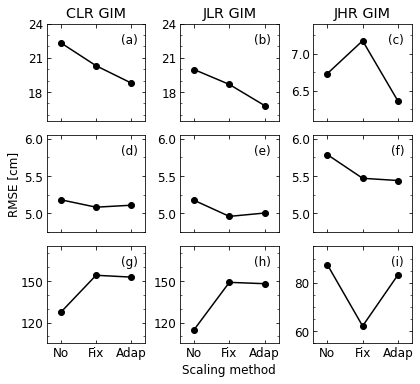

In [158]:
x = [0,1,2]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=[6, 5.5], sharex=True)
for i in range(3):
    tecs = list(rDicts[i].values())
    clr, jlr, jhr = tecs[1:4], tecs[4:7], tecs[7:10]
    for j, tec in enumerate([tecs[1:4], tecs[4:7], tecs[7:10]]):
        axs[i, j].plot(x, tec, 'o-', color='k')
# axis format
nums = ['(a)', '(b)', '(c)',
        '(d)', '(e)', '(f)',
        '(g)', '(h)', '(i)']
gnames = ['CLR GIM', 'JLR GIM', 'JHR GIM']
for i, ax in enumerate(axs.flatten()):
    ax.tick_params(which='both', direction='in', top=True, bottom=True, left=True, right=True)
    ax.annotate(f'{nums[i]}', xy=(0.92, 0.8), xycoords='axes fraction', ha='right')
    #ax.annotate(f'{nums[i]}', xy=(0.07, 0.1), xycoords='axes fraction')
    #ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.set_xlim(-0.4, 2.4)
for ax in axs[0,:2]:  ax.set_ylim(15.5, 24);   ax.yaxis.set_major_locator(ticker.MultipleLocator(3));   ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
for ax in axs[0,2:]:  ax.set_ylim(6.1, 7.4);   ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5)); ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))
for ax in axs[1,:3]:  ax.set_ylim(4.75, 6.05); ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5)); ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))
for ax in axs[2,:2]:  ax.set_ylim(105, 175);   ax.yaxis.set_major_locator(ticker.MultipleLocator(30));  ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
for ax in axs[2,2:]:  ax.set_ylim(55, 95);     ax.yaxis.set_major_locator(ticker.MultipleLocator(20));  ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
for i in range(3):    axs[0,i].set_title(gnames[i])
axs[1,0].set_ylabel('RMSE [cm]')
axs[2,1].set_xlabel('Scaling method')
plt.xticks(x, ['No', 'Fix', 'Adap'])
fig.tight_layout()
fig.subplots_adjust(wspace=0.35)

# outputs
out_fig = os.path.join(work_dir, 'topTEC_scale_rmse_base.pdf')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()

Take home message:
1. For Sentinel-1 ascending, adaptive ratio is the best, not surprising since the model is calculated from the same dataset
2. For Sentinel-1 descending, same altitude, different local time, applying ratio helps, but not obvious whether fixed or adaptive
3. For ALOS-2, different altitude, different local time, applying ratio get worse